# Spam Email Detection With ML

In [14]:
# standard data
qdf = pd.read_csv('spambase.data', header=None)
train_qdf, test_qdf = train_test_split(qdf, test_size=0.2, random_state=25)
test_qdf, eval_qdf = train_test_split(test_qdf, test_size=0.5, random_state=7)

qtrainy = train_qdf[57]
qtrainx = train_qdf.drop(columns=[57])
qtestx = test_qdf.drop(columns=[57])
qtesty = test_qdf[57]

#normalized data
ndf = qdf.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
train_ndf, test_ndf = train_test_split(ndf, test_size=0.2, random_state=25)
test_ndf, eval_ndf = train_test_split(test_ndf, test_size=0.5, random_state=7)

ntrainy = train_ndf[57]
ntrainx = train_ndf.drop(columns=[57])
ntestx = test_ndf.drop(columns=[57])
ntesty = test_ndf[57]

In [15]:
# KNN
cl_knn = KNeighborsClassifier()
cl_knn.fit(ntrainx, ntrainy)

y_score3 = cl_knn.predict_proba(ntestx)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(ntesty, y_score3)

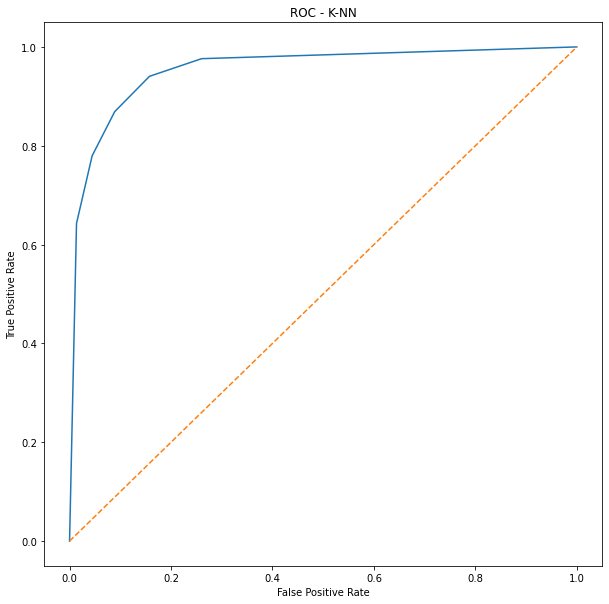

In [16]:
# ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('ROC - K-NN')
line1 = plt.plot(false_positive_rate3, true_positive_rate3)
line2 = plt.plot([0, 1], ls="--")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Lift Chart - K-NN')

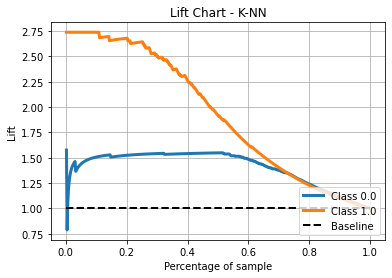

In [18]:
# Lift Chart
y_predict3 = cl_knn.predict_proba(ntestx)
plot_lift_curve(ntesty, y_predict3)
plt.title('Lift Chart - K-NN')

In [41]:
# Accuracy (Standard)
ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
kng = {'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance'], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

cl_knn_search = GridSearchCV(estimator= cl_knn, param_grid = kng, scoring=scr, cv=icv)

knn_score = cross_val_score(cl_knn_search, qtrainx, qtrainy, cv= ocv)
qpred1 = cl_knn_search.fit(qtrainx,qtrainy).best_estimator_.predict(qtestx)
print("Run Score", knn_score)
print("Mean Score", knn_score.mean())

Run Score [0.8125     0.82336957 0.83967391 0.8125     0.83695652 0.81521739
 0.83423913 0.81521739 0.8125     0.82065217]
Mean Score 0.8222826086956522


In [43]:
# Accuracy (Normalized)
ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
kng = {'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance'], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

cl_knn_search = GridSearchCV(estimator= cl_knn, param_grid = kng, scoring=scr, cv=icv)
npred1 = cl_knn_search.fit(ntrainx,ntrainy).best_estimator_.predict(ntestx)
knn_score = cross_val_score(cl_knn_search, ntrainx, ntrainy, cv= ocv)
print("Run Score", knn_score)
print("Mean Score", knn_score.mean())

Run Score [0.9076087  0.90217391 0.91304348 0.91304348 0.91576087 0.90217391
 0.89130435 0.9048913  0.92119565 0.91032609]
Mean Score 0.9081521739130436


In [49]:
# Misclassiciation Cost (Standard)
matrix = confusion_matrix(qtesty, qpred1)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('KNN (Standard) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(qtesty, qpred1, average=None))
print('Recall:', recall_score(qtesty, qpred1, average=None))
print('Misclassiciation Cost:', m_cost)

KNN (Standard) Stats:
Confusion Matrix
[[241  51]
 [ 40 128]]
Precision: [0.85765125 0.7150838 ]
Recall: [0.82534247 0.76190476]
Misclassiciation Cost: 550


In [51]:
# Missclassiciation Cost (Normalized)
matrix = confusion_matrix(ntesty, npred1)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('KNN (Normalized) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(ntesty, npred1, average=None))
print('Recall:', recall_score(ntesty, npred1, average=None))
print('Misclassiciation Cost:', m_cost)

KNN (Normalized) Stats:
Confusion Matrix
[[270  22]
 [ 18 150]]
Precision: [0.9375     0.87209302]
Recall: [0.92465753 0.89285714]
Misclassiciation Cost: 238


In [57]:
# Decision Tree
cl_tree = DecisionTreeClassifier(class_weight={0:10,1:1})

cl_tree.fit(ntrainx, ntrainy)

y_score4 = cl_tree.predict_proba(ntestx)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(ntesty, y_score4)

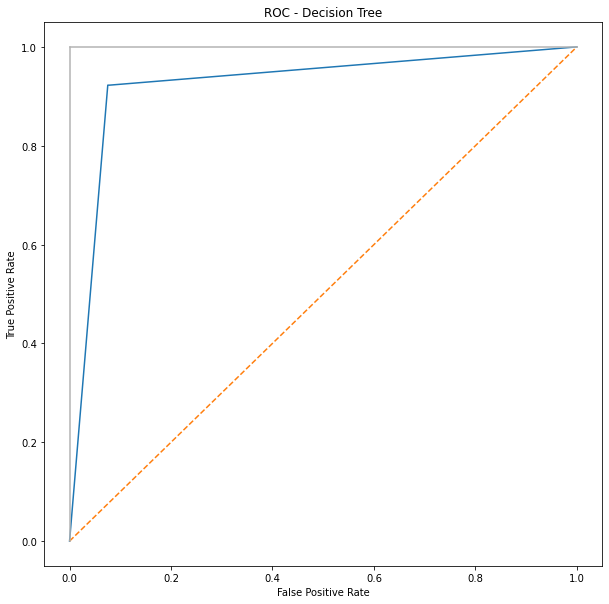

In [58]:
# ROC Curve
# Decision Tree ROC
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Decision Tree')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Lift Curve - Decision Tree')

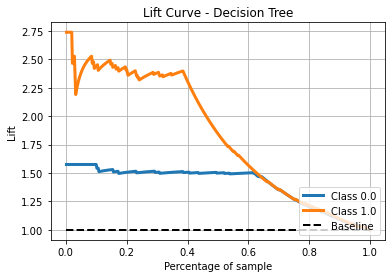

In [59]:
# Lift Chart
y_predict = cl_tree.predict_proba(ntestx)
plot_lift_curve(ntesty, y_predict)
plt.title('Lift Curve - Decision Tree')

In [60]:
# Accuracy (Standard)
cl_tree = DecisionTreeClassifier(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
dtg = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'criterion' : ['gini', 'entropy']}

cl_tree_search = GridSearchCV(estimator= cl_tree, param_grid = dtg, scoring = scr, cv  =icv)

knn_score = cross_val_score(cl_knn_search, qtrainx, qtrainy, cv= ocv)
qpred2 = cl_tree_search.fit(qtrainx,qtrainy).best_estimator_.predict(qtestx)
print("Run Score", knn_score)
print("Mean Score", knn_score.mean())

Run Score [0.8125     0.82336957 0.83967391 0.8125     0.83695652 0.81521739
 0.83423913 0.81521739 0.8125     0.82065217]
Mean Score 0.8222826086956522


In [61]:
# Missclassiciation Cost (Standard)
matrix = confusion_matrix(qtesty, qpred2)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Decision Tree (Standard) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(qtesty, qpred2, average=None))
print('Recall:', recall_score(qtesty, qpred2, average=None))
print('Misclassiciation Cost:', m_cost)

Decision Tree (Standard) Stats:
Confusion Matrix
[[284   8]
 [ 22 146]]
Precision: [0.92810458 0.94805195]
Recall: [0.97260274 0.86904762]
Misclassiciation Cost: 102


In [62]:
# Accuracy (Normalized)
cl_tree = DecisionTreeClassifier(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
dtg = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'criterion' : ['gini', 'entropy']}

cl_tree_search = GridSearchCV(estimator= cl_tree, param_grid = dtg, scoring = scr, cv  =icv)

knn_score = cross_val_score(cl_knn_search, ntrainx, ntrainy, cv= ocv)
npred2 = cl_tree_search.fit(ntrainx,ntrainy).best_estimator_.predict(ntestx)
print("Run Score", knn_score)
print("Mean Score", knn_score.mean())

Run Score [0.9076087  0.90217391 0.91304348 0.91304348 0.91576087 0.90217391
 0.89130435 0.9048913  0.92119565 0.91032609]
Mean Score 0.9081521739130436


In [66]:
# Missclassiciation Cost (Normalized)
matrix = confusion_matrix(ntesty, npred2)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Decision Tree (Normalized) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(ntesty, npred2, average=None))
print('Recall:', recall_score(ntesty, npred2, average=None))
print('Misclassiciation Cost:', m_cost)

Decision Tree (Normalized) Stats:
Confusion Matrix
[[285   7]
 [ 23 145]]
Precision: [0.92532468 0.95394737]
Recall: [0.9760274  0.86309524]
Misclassiciation Cost: 93


In [102]:
# SVM
cl_svm = SVC(class_weight={0:10,1:1}, probability=True)
cl_svm.fit(ntrainx, ntrainy)

y_score5 = cl_tree.predict_proba(ntestx)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(ntesty, y_score5)

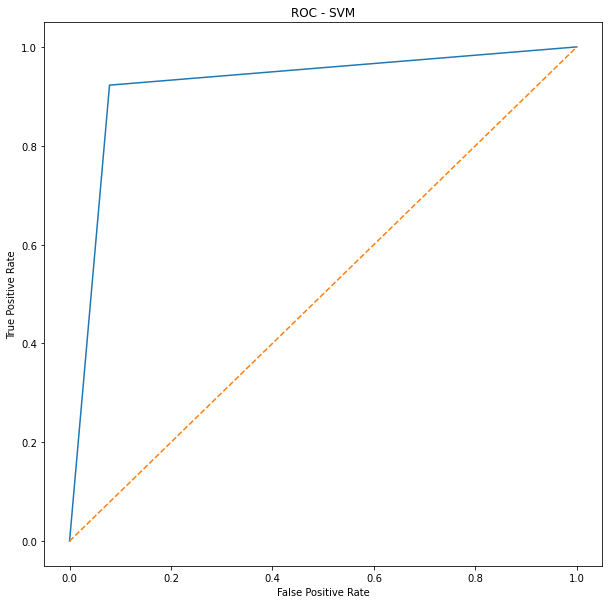

In [103]:
# ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM')
line1 = plt.plot(false_positive_rate5, true_positive_rate5)
line2 = plt.plot([0, 1], ls="--")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Lift Curve - SVM')

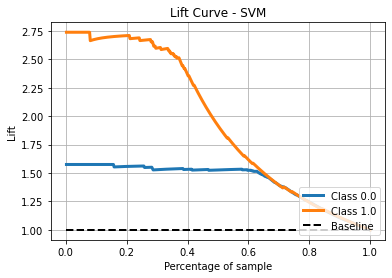

In [104]:
# Lift Chart
y_predict4 = cl_svm.fit(ntrainx, ntrainy).predict_proba(ntestx)
plot_lift_curve(ntesty, y_predict4)
plt.title('Lift Curve - SVM')

In [105]:
# Accuracy (Standard)
cl_svm = SVC(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
svg = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]}]

cl_svm_search = GridSearchCV(estimator= cl_svm, param_grid = svg, scoring = scr, cv  =icv)
svm_score = cross_val_score(cl_svm_search, qtrainx, qtrainy, cv= ocv)
qpred3 = cl_svm_search.fit(qtrainx,qtrainy).best_estimator_.predict(qtestx)
print("Run Score", svm_score)
print("Mean Score", svm_score.mean())

Run Score [0.79076087 0.78804348 0.7826087  0.76902174 0.7798913  0.73641304
 0.75543478 0.75543478 0.79076087 0.79347826]
Mean Score 0.7741847826086957


In [106]:
# Missclassiciation Cost (Standard)
matrix = confusion_matrix(qtesty, qpred3)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('SVM (Standard) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(qtesty, qpred3, average=None))
print('Recall:', recall_score(qtesty, qpred3, average=None))
print('Misclassiciation Cost:', m_cost)

SVM (Standard) Stats:
Confusion Matrix
[[288   4]
 [ 88  80]]
Precision: [0.76595745 0.95238095]
Recall: [0.98630137 0.47619048]
Misclassiciation Cost: 128


In [107]:
# Accuracy (Normalized)
cl_svm = SVC(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
svg = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]}]

cl_svm_search = GridSearchCV(estimator= cl_svm, param_grid = svg, scoring = scr, cv  =icv)
svm_score = cross_val_score(cl_svm_search, ntrainx, ntrainy, cv= ocv)
npred3 = cl_svm_search.fit(ntrainx,ntrainy).best_estimator_.predict(ntestx)
print("Run Score", svm_score)
print("Mean Score", svm_score.mean())

Run Score [0.93206522 0.91304348 0.93206522 0.92119565 0.92391304 0.92119565
 0.92391304 0.89402174 0.93478261 0.91576087]
Mean Score 0.9211956521739129


In [108]:
# Missclassiciation Cost (Normalized)
matrix = confusion_matrix(ntesty, npred3)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('SVM (Normalized) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(ntesty, npred3, average=None))
print('Recall:', recall_score(ntesty, npred3, average=None))
print('Misclassiciation Cost:', m_cost)

SVM (Normalized) Stats:
Confusion Matrix
[[276  16]
 [ 17 151]]
Precision: [0.94197952 0.90419162]
Recall: [0.94520548 0.89880952]
Misclassiciation Cost: 177


In [109]:
# Random Forest
cl_rf = RandomForestClassifier(class_weight={0:10,1:1})
cl_rf.fit(ntrainx, ntrainy)

y_score6 = cl_rf.predict_proba(ntestx)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(ntesty, y_score6)

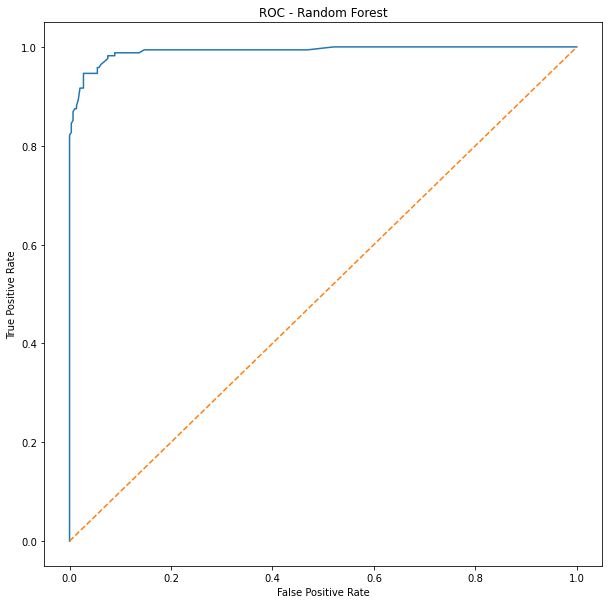

In [110]:
# ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Random Forest')
line1 = plt.plot(false_positive_rate6, true_positive_rate6)
line2 = plt.plot([0, 1], ls="--")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Lift Curve - Random Forest')

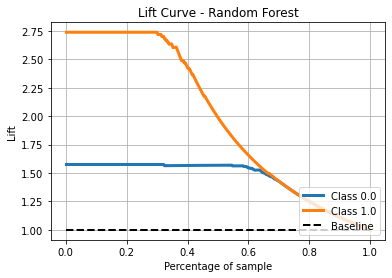

In [111]:
# Lift Chart
y_predict = cl_rf.predict_proba(ntestx)
plot_lift_curve(ntesty, y_predict)
plt.title('Lift Curve - Random Forest')

In [81]:
# Accuracy (Standard)
cl_rf = RandomForestClassifier(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
rfg = [{'criterion': ['gini','entropy'],'max_depth': [1,2,3,4,5,6,7,8,9,10]}]

cl_rf_search = GridSearchCV(estimator= cl_rf, param_grid = rfg, scoring = scr, cv  =icv)
rf_score = cross_val_score(cl_rf_search, qtrainx, qtrainy, cv= ocv)
qpred4 = cl_rf_search.fit(qtrainx,qtrainy).best_estimator_.predict(qtestx)
print("Run Score", rf_score)
print("Mean Score", rf_score.mean())

Run Score [0.92663043 0.91576087 0.92934783 0.89945652 0.92934783 0.88586957
 0.91304348 0.92391304 0.92119565 0.93478261]
Mean Score 0.9179347826086957


In [82]:
# Missclassiciation Cost (Standard)
matrix = confusion_matrix(qtesty, qpred4)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Random Forest (Standard) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(qtesty, qpred4, average=None))
print('Recall:', recall_score(qtesty, qpred4, average=None))
print('Misclassiciation Cost:', m_cost)

Random Forest (Standard) Stats:
Confusion Matrix
[[290   2]
 [ 25 143]]
Precision: [0.92063492 0.9862069 ]
Recall: [0.99315068 0.85119048]
Misclassiciation Cost: 45


In [83]:
# Accuracy (Normalized)
cl_rf = RandomForestClassifier(class_weight={0:10,1:1})

ocv = KFold(n_splits = 10, shuffle = True, random_state =9)

icv = KFold(n_splits = 10, shuffle = True, random_state =9)

scr = 'accuracy'
rfg = [{'criterion': ['gini','entropy'],'max_depth': [1,2,3,4,5,6,7,8,9,10]}]

cl_rf_search = GridSearchCV(estimator= cl_rf, param_grid = rfg, scoring = scr, cv  =icv)
rf_score = cross_val_score(cl_rf_search, ntrainx, ntrainy, cv= ocv)
npred4 = cl_rf_search.fit(ntrainx,ntrainy).best_estimator_.predict(ntestx)
print("Run Score", rf_score)
print("Mean Score", rf_score.mean())

Run Score [0.92663043 0.91847826 0.92663043 0.89402174 0.92391304 0.88586957
 0.92391304 0.92391304 0.91847826 0.93478261]
Mean Score 0.9176630434782608


In [84]:
# Missclassiciation Cost (Normalized)
matrix = confusion_matrix(ntesty, npred4)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Random Forest (Normalized) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(ntesty, npred4, average=None))
print('Recall:', recall_score(ntesty, npred4, average=None))
print('Misclassiciation Cost:', m_cost)

Random Forest (Normalized) Stats:
Confusion Matrix
[[289   3]
 [ 26 142]]
Precision: [0.91746032 0.97931034]
Recall: [0.98972603 0.8452381 ]
Misclassiciation Cost: 56


In [112]:
# Logisitic Regression
cl_lg = LogisticRegression(class_weight={0:10,1:1})
cl_lg.fit(ntrainx, ntrainy)

y_score7 = cl_lg.predict_proba(ntestx)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(ntesty, y_score7)

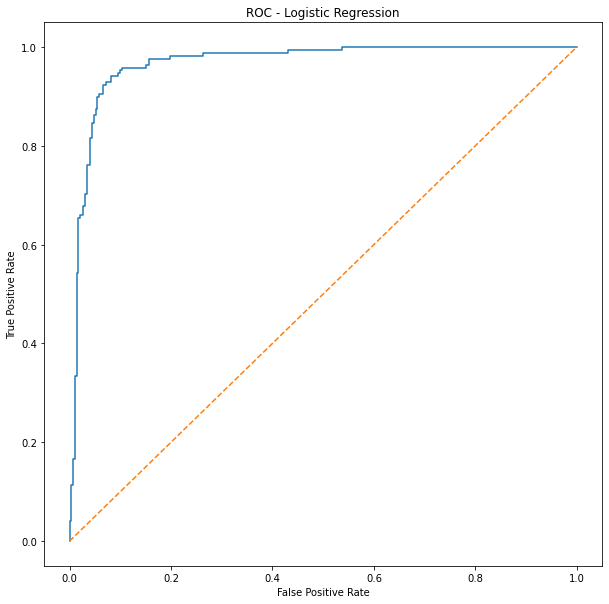

In [113]:
# ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Logistic Regression')
line1 = plt.plot(false_positive_rate7, true_positive_rate7)
line2 = plt.plot([0, 1], ls="--")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Lift Curve - Logistic Regression')

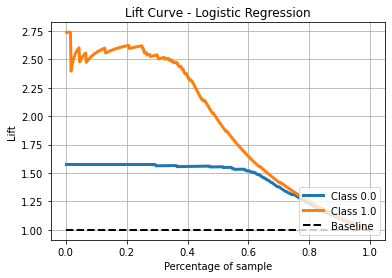

In [114]:
# Lift Chart
y_predict = cl_lg.predict_proba(ntestx)
plot_lift_curve(ntesty, y_predict)
plt.title('Lift Curve - Logistic Regression')

In [87]:
%%capture --no-display
# Accuracy (Standard)
cl_lg = LogisticRegression(class_weight={0:10,1:1})

ocv = KFold(n_splits = 5, shuffle = True, random_state =9)

icv = KFold(n_splits = 5, shuffle = True, random_state =9)

scr = 'accuracy'
lgg = [{'solver': ['newton-cg', 'saga', 'sag', 'lbfgs', 'liblinear'], 'penalty': ['l2'],
                     'C': [1e-4, 1e-3, 1e-2,0.1,0.5, 1]}, {'solver' : ['liblinear', 'saga'], 
                                                        'penalty': ['l1'], 'C': [1e-4, 1e-3, 1e-2,0.1,0.5,1]}, 
                                                        {'solver' : ['saga'], 'penalty': ['elasticnet'], 'C': [1e-4, 1e-3, 1e-2,0.1,0.5,1]}]

cl_lg_search = GridSearchCV(estimator= cl_lg, param_grid = lgg, scoring=scr, cv=icv)
lg_score = cross_val_score(cl_lg_search, qtrainx, qtrainy, cv= ocv)
qpred5 = cl_lg_search.fit(qtrainx,qtrainy).best_estimator_.predict(qtestx)

In [88]:
print("Run Score", lg_score)
print("Mean Score", lg_score.mean())

Run Score [0.85733696 0.84782609 0.8451087  0.82608696 0.86820652]
Mean Score 0.8489130434782609


In [92]:
# Missclassiciation Cost (Standard)
matrix = confusion_matrix(qtesty, qpred5)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Logistic Regression (Standard) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(qtesty, qpred5, average=None))
print('Recall:', recall_score(qtesty, qpred5, average=None))
print('Misclassiciation Cost:', m_cost)

Logistic Regression (Standard) Stats:
Confusion Matrix
[[286   6]
 [ 67 101]]
Precision: [0.8101983  0.94392523]
Recall: [0.97945205 0.60119048]
Misclassiciation Cost: 127


In [89]:
%%capture --no-display
# Accuracy (Normalized)
cl_lg = LogisticRegression(class_weight={0:10,1:1})

ocv = KFold(n_splits = 5, shuffle = True, random_state =9)

icv = KFold(n_splits = 5, shuffle = True, random_state =9)

scr = 'accuracy'
lgg = [{'solver': ['newton-cg', 'saga', 'sag', 'lbfgs', 'liblinear'], 'penalty': ['l2'],
                     'C': [1e-4, 1e-3, 1e-2,0.1,0.5, 1]}, {'solver' : ['liblinear', 'saga'], 
                                                        'penalty': ['l1'], 'C': [1e-4, 1e-3, 1e-2,0.1,0.5,1]}, 
                                                        {'solver' : ['saga'], 'penalty': ['elasticnet'], 'C': [1e-4, 1e-3, 1e-2,0.1,0.5,1]}]

cl_lg_search = GridSearchCV(estimator= cl_lg, param_grid = lgg, scoring=scr, cv=icv)
lg_score = cross_val_score(cl_lg_search, ntrainx, ntrainy, cv= ocv)
npred5 = cl_lg_search.fit(ntrainx,ntrainy).best_estimator_.predict(ntestx)

In [90]:
print("Run Score", lg_score)
print("Mean Score", lg_score.mean())

Run Score [0.82608696 0.83016304 0.80434783 0.80027174 0.83423913]
Mean Score 0.8190217391304347


In [93]:
# Missclassiciation Cost (Normalized)
matrix = confusion_matrix(ntesty, npred5)
fp = matrix[0,1]
fn = matrix[1,0]
m_cost = fp * 10 + fn * 1

print('Random Forest (Normalized) Stats:')
print('Confusion Matrix')
print(matrix)
print('Precision:', precision_score(ntesty, npred5, average=None))
print('Recall:', recall_score(ntesty, npred5, average=None))
print('Misclassiciation Cost:', m_cost)

Random Forest (Normalized) Stats:
Confusion Matrix
[[287   5]
 [ 74  94]]
Precision: [0.79501385 0.94949495]
Recall: [0.98287671 0.55952381]
Misclassiciation Cost: 124


In [ ]:
""""""""""
FINAL RESULTS
Standard
KNN:
Mean Accuracy: 0.8222826086956522
Precision: [0.85765125 0.7150838 ]
Recall: [0.82534247 0.76190476]
Misclassiciation Cost: 550

Decision Tree :
Mean Accuracy: 0.8222826086956522
Precision: [0.92810458 0.94805195]
Recall: [0.97260274 0.86904762]
Misclassiciation Cost: 102

SVM:
Mean Accuracy: 0.7741847826086957
Precision: [0.76595745 0.95238095]
Recall: [0.98630137 0.47619048]
Misclassiciation Cost: 128

Random Forest:
Mean Accuracy: 0.9179347826086957
Precision: [0.92063492 0.9862069 ]
Recall: [0.99315068 0.85119048]
Misclassiciation Cost: 45

Logistic Regression:
Mean Accuracy: 0.8489130434782609
Precision: [0.8101983  0.94392523]
Recall: [0.97945205 0.60119048]
Misclassiciation Cost: 127

Normalized
KNN:
Mean Accuracy: 0.9081521739130436
Precision: [0.9375     0.87209302]
Recall: [0.92465753 0.89285714]
Misclassiciation Cost: 238

Decision Tree:
Mean Accuracy: 0.9081521739130436
Precision: [0.92532468 0.95394737]
Recall: [0.9760274  0.86309524]
Misclassiciation Cost: 93

SVM:
Mean Accuracy: 0.9211956521739129
Precision: [0.94197952 0.90419162]
Recall: [0.94520548 0.89880952]
Misclassiciation Cost: 177

Random Forest:
Mean Accuracy: 0.9176630434782608
Precision: [0.91746032 0.97931034]
Recall: [0.98972603 0.8452381 ]
Misclassiciation Cost: 56

Logistic Regression:
Mean Accuracy: 0.8190217391304347
Precision: [0.79501385 0.94949495]
Recall: [0.98287671 0.55952381]
Misclassiciation Cost: 124


SVM is best model in terms of predictive accuracy and Random Forest is the best model in terms of misclassification cost.

In [101]:
# Best Parameters
# Random Forest
cl_rf_search.fit(ntrainx,ntrainy).best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [116]:
%%capture --no-display
# SVM
lg_param = cl_lg_search.fit(ntrainx,ntrainy).best_params_

In [117]:
lg_param

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

### Analysis

#### Pre-processing
To compare the impact of pre-processing, I created two data-frames: one that uses min-max normalization and one that does not. I then conducted a train-test-evaluation split on both dataframes and used the training data splits to train the models.
#### Prediction Approach
I compared 5 classification techniques (KNN, Decision Tree, SVM, Random Forest, Logistic Regression) on two different datasets (normalized and non-normalized). For each model, I generated ROC curves and lift charts, and then conducted a nested cross-validation. Afterwards, I used the best estimator from the cross-validation to create a confusion matrix, alongside the precision, recall, and misclassification cost. To take into account cost ratios, false positive values were weighted with a cost of 10 and false negative were weighted with a cost of 1. This is due to the risk of an important email being flagged as spam is much more harmful than a spam message not being automatically identified. 
#### Performance Metrics Findings
The min-max normalization led to an increase in mean accuracy in the majority of models, most notably with KNN, Decision Tree, and SVM. Random Forest and Logistic Regression had a better mean accuracy on the non-normalized data, but the impact on other metrics remained closely similar.

The best model in terms of predictive accuracy was SVM with a mean accuracy of 0.921 on the normalized data. This model's best paramters utilized a C of 1, penalty of 11, and a liblinear solver. This results in precision scores of 0.94197952 and 0.90419162 and recall scores of 0.94520548 and 0.89880952, alongside a miscalssifcation cost of 177.

The best model in terms of cost-sensitivty was Random Forest with a misclassification cost of 56 on the normalized data. The best parameters for the model used an entropy criterion and a max depth of 10. The model also had a relatively strong mean accuracy of 0.918, precision scores of 0.91746032 and  0.97931034, and recall scores of 0.98972603 and 0.8452381.

#### Conclusion
Based on the reported models, it can be concluded that the best model in terms of accuracy to handle the spambase data is the SVM model. Meanwhile, if we seek to minimize the misclassifcation cost, the best model to use would be Random Forest. Additionally for pre-processing, SVM's accuracy is significantly improved by min-max normalizing the dataset, while Random Forest does not benifit from said normalization. As such, SVM will help best ensure the spam emails and non-spam emails are correctly classifed, while Random Forest will help best reduce the incorrect flagging of emails as spam and non-spam.
